***Preparation Steps***

**1.)Importing all the necessary modules**

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import AgglomerativeClustering


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

**2.)Loading the Dataset**

*The below code is directly taken from the uci machine learning repository*

**LINK**: https://archive.ics.uci.edu/dataset/763/land%2Bmines-1

In [2]:
# fetch dataset 
land_mines = fetch_ucirepo(id=763) 

# data (as pandas dataframes) 
X = land_mines.data.features 
y = land_mines.data.targets 

# Combining the features and targets into a single dataframe
data = pd.concat([X, y], axis=1)
column_names = ["voltage", "height", "soiltype", "minetype"]
data.columns = column_names

<hr>

***Data Preprocessing***

**1.)Wxploring the datasrt**

In [3]:
data.head()

,voltage,height,soiltype,minetype
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   voltage   338 non-null    float64
 1   height    338 non-null    float64
 2   soiltype  338 non-null    float64
 3   minetype  338 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 10.7 KB


**2.) Checking for missing values**

In [5]:
data.isnull().sum()

voltage     0
height      0
soiltype    0
minetype    0
dtype: int64

There are no missing values in the dataset

**3.) Checking for outliers using boxplots**

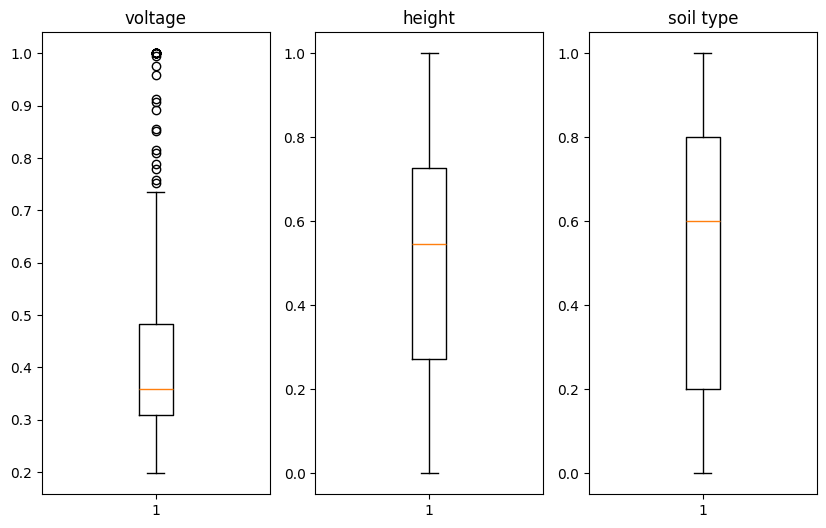

In [6]:
plt.figure(figsize=(10,6))

plt.subplot(1,3,1)
plt.boxplot(data["voltage"])
plt.title("voltage")

plt.subplot(1,3,2)
plt.boxplot(data["height"])
plt.title("height")

plt.subplot(1,3,3)
plt.boxplot(data["soiltype"])
plt.title("soil type")

plt.show()

**4.)Removing the outliers**

In [7]:
q1 = data['voltage'].quantile(0.25)
q3 = data['voltage'].quantile(0.75)
iqr = q3-q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(0.05040037737500008, 0.7419642903749999)

In [8]:
data =data.copy()
data.loc[(data['voltage']>upper_limit), 'voltage'] = upper_limit
data.loc[(data['voltage']<lower_limit), 'voltage'] = lower_limit

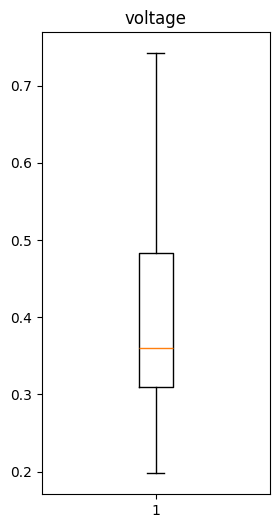

In [9]:
plt.figure(figsize=(10,6))

plt.subplot(1,3,1)
plt.boxplot(data["voltage"].dropna())
plt.title("voltage")
plt.show()

**5.)Standard Scaling the data**

In [10]:
features = data.drop(columns=['minetype'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features = pd.DataFrame(scaled_features, columns=features.columns)
scaled_features.dropna(inplace=True)

In [11]:
scaled_features.head()

,voltage,height,soiltype
0,-0.498983,-1.665222,-1.464942
1,-0.620077,-1.070248,-1.464942
2,-0.844704,-0.772762,-1.464942
3,-1.052382,-0.177788,-1.464942
4,-1.008069,0.119699,-1.464942


<hr>

***Applying dbscan clustering***

In [12]:
# db = DBSCAN(eps=0.3, min_samples=10).fit(scaled_features)

In [13]:
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
# labels = db.labels_

In [14]:
# unique_labels = set(labels)
# colors = ['y', 'b', 'g', 'r']
# print(colors)
# for k, col in zip(unique_labels, colors):
#     if k == -1:
#         # Black used for noise.
#         col = 'k'

#     class_member_mask = (labels == k)

#     xy = X[class_member_mask & core_samples_mask]
#     plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
#              markeredgecolor='k',
#              markersize=6)

#     xy = X[class_member_mask & ~core_samples_mask]
#     plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
#              markeredgecolor='k',
#              markersize=6)

# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# plt.title('number of clusters: %d' % n_clusters_)
# plt.show()

<hr>

***Applying Kmeans clustering***

**1.) Finding the optimal number of clusters using elbow method**

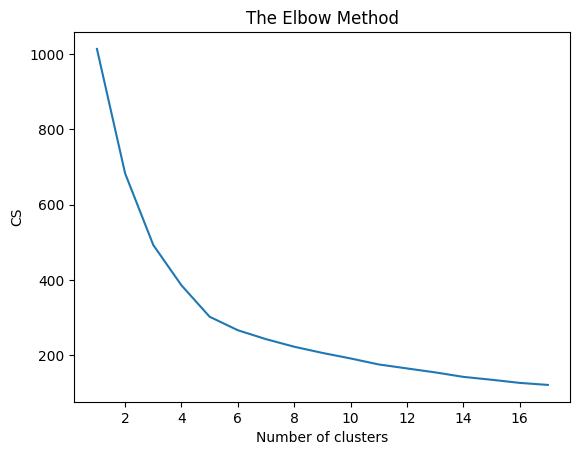

In [15]:
cs = []
for i in range(1, 18):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 18), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

**CONCLUSION**: The optmial number of clusters according to elbow method is 4

**2.) Fitting the model**

In [16]:

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_features)
labels_4_clusters = kmeans.labels_

# Create a copy of the data DataFrame
data= data.copy()
data['cluster_value'] = labels_4_clusters


**3.)Visualising the clusters in 3d**

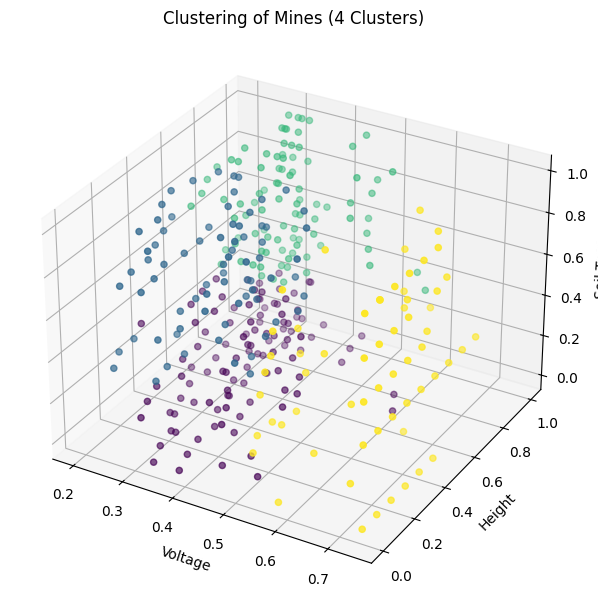

In [17]:

fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(data['voltage'], data['height'], data['soiltype'], c=data['cluster_value'], cmap='viridis')
ax.set_title('Clustering of Mines (4 Clusters)')
ax.set_xlabel('Voltage')
ax.set_ylabel('Height')
ax.set_zlabel('Soil Type')

plt.tight_layout()
plt.show()


**4.) Evaluating the model using silhouette score**

In [18]:
silhouette_original = silhouette_score(scaled_features, data['cluster_value'])

-> The Silhouette score for the original data using kmeans clustering is : 0.30976780440378515

<hr>
<hr>

***Creating new data using Augmented data generation***

In [19]:

def generate_augmented_data(df, num_dpoints_per_type=100, noise_levels=None, integer_features=None, decimal_features=None, cluster_feature='cluster_value'):

    if noise_levels is None:
        noise_levels = 0.1  
    if isinstance(noise_levels, float):
        noise_levels = {col: noise_levels for col in df.drop(columns=[cluster_feature]).columns}
    if integer_features is None:
        integer_features = []
    if decimal_features is None:
        decimal_features = {}
    
    cluster_means = df.groupby(cluster_feature).mean().reset_index()
    augmented_data = []
    
    for idx, row in cluster_means.iterrows():
        cluster_type = row[cluster_feature]
        cluster_mean_values = row.drop(cluster_feature)
        
        cluster_augmented_data = pd.DataFrame(columns=df.columns.drop([cluster_feature]))
        
        for feature in cluster_mean_values.index:
            noise = np.random.normal(0, noise_levels[feature], num_dpoints_per_type)
            max_value = df[feature].max() * 1.1
            min_value = df[feature].min() * 0.9
            augmented_feature_values = np.clip(cluster_mean_values[feature] + noise, min_value, max_value)
            
            if feature in integer_features:
                augmented_feature_values = np.round(augmented_feature_values).astype(int)
            if feature in decimal_features:
                decimal_places = decimal_features[feature]
                augmented_feature_values = np.round(augmented_feature_values, decimals=decimal_places)
            cluster_augmented_data[feature] = augmented_feature_values
        
        cluster_augmented_data[cluster_feature] = cluster_type
        augmented_data.append(cluster_augmented_data)
    
    augmented_data_df = pd.concat(augmented_data, ignore_index=True)
    
    return augmented_data_df


In [20]:

augmented_data = generate_augmented_data(
    data, 
    num_dpoints_per_type=100, 
    noise_levels={'voltage': 0.1, 'height': 0.2, 'soiltype': 0.2, 'minetype': 0.1},
    integer_features=['minetype'],
    decimal_features={'soiltype': 1}  
)

print(augmented_data.head(102))


      voltage    height  soiltype  minetype  cluster_value
0    0.560997  0.494015       0.3         3            0.0
1    0.294813  0.532385       0.0         3            0.0
2    0.449616  1.056859       0.0         3            0.0
3    0.452341  0.425722       0.2         3            0.0
4    0.367023  0.945593       0.1         3            0.0
..        ...       ...       ...       ...            ...
97   0.186603  0.195268       0.1         3            0.0
98   0.321550  0.460259       0.0         3            0.0
99   0.358955  0.501221       0.0         3            0.0
100  0.304017  0.380298       0.5         3            1.0
101  0.304732  0.000000       0.7         3            1.0

[102 rows x 5 columns]


**Visualising the original data and the augmented data**

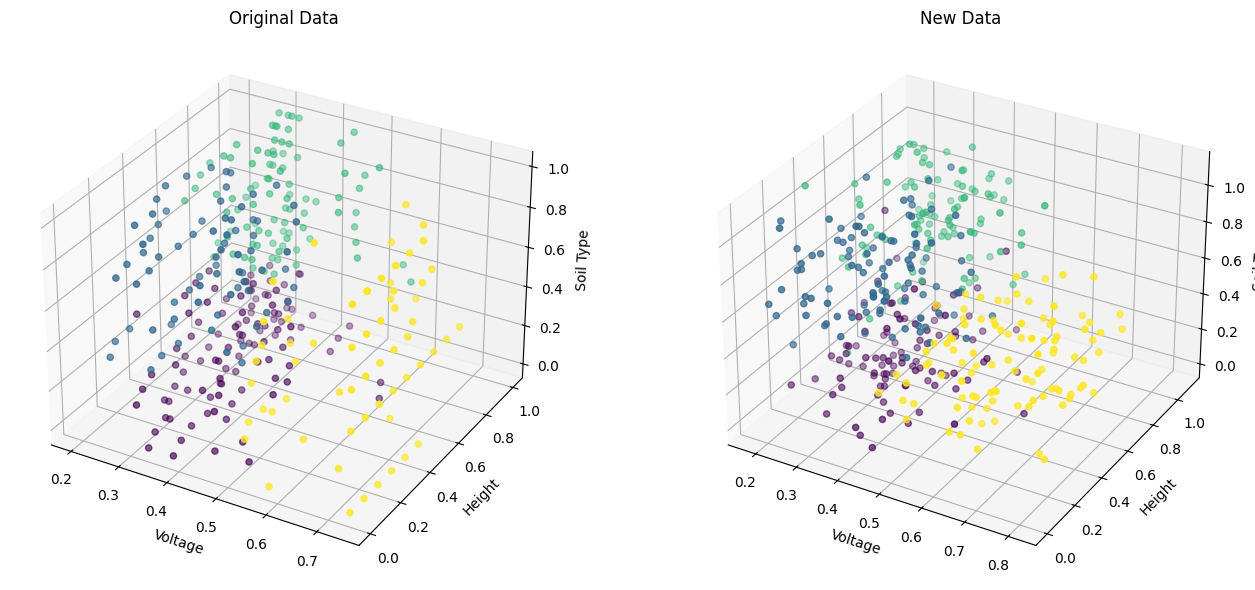

Silhouette Score for Original Data: 0.30976780440378515
Silhouette Score for augmented Data: 0.3135557624111371


In [21]:
data['source'] = 'original'
augmented_data['source'] = 'augmented'
combined_data = pd.concat([data, augmented_data], ignore_index=True)

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(data['voltage'], data['height'], data['soiltype'], c=data['cluster_value'], cmap='viridis')
ax1.set_title('Original Data')
ax1.set_xlabel('Voltage')
ax1.set_ylabel('Height')
ax1.set_zlabel('Soil Type')

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(augmented_data['voltage'], augmented_data['height'], augmented_data['soiltype'], c=augmented_data['cluster_value'], cmap='viridis')
ax2.set_title('New Data')
ax2.set_xlabel('Voltage')
ax2.set_ylabel('Height')
ax2.set_zlabel('Soil Type')

plt.tight_layout()
plt.show()


scaler = StandardScaler()
scaled_features_original = scaler.fit_transform(data.drop(columns=['minetype', 'cluster_value', 'source']))
scaled_features_augmented = scaler.transform(augmented_data.drop(columns=['minetype', 'cluster_value', 'source']))

silhouette_original = silhouette_score(scaled_features_original, data['cluster_value'])
silhouette_augmented = silhouette_score(scaled_features_augmented, augmented_data['cluster_value'])

print(f"Silhouette Score for Original Data: {silhouette_original}")
print(f"Silhouette Score for augmented Data: {silhouette_augmented}")

<hr>

***Performing Agglomerative Hirearchial clustering***

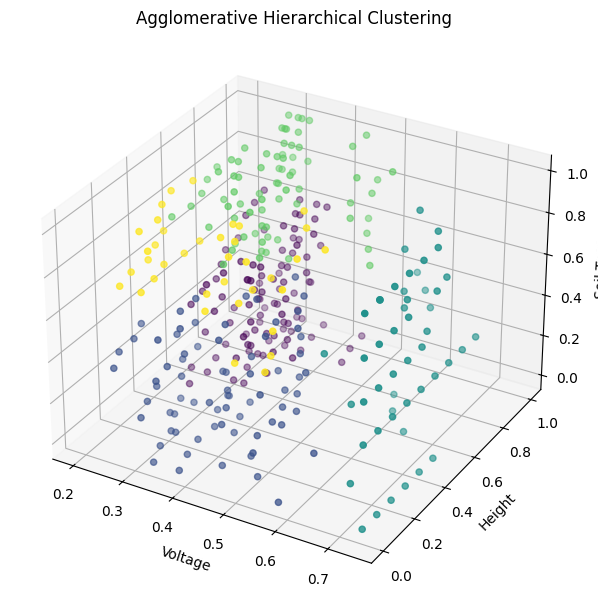

In [22]:
agg_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=10, linkage='ward')
data['agg_cluster'] = agg_cluster.fit_predict(scaled_features)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(data['voltage'], data['height'], data['soiltype'], c=data['agg_cluster'], cmap='viridis')
ax.set_title('Agglomerative Hierarchical Clustering')
ax.set_xlabel('Voltage')
ax.set_ylabel('Height')
ax.set_zlabel('Soil Type')
plt.tight_layout()
plt.show()

**Performing Agglamated hirearchial clustering on augmented data**

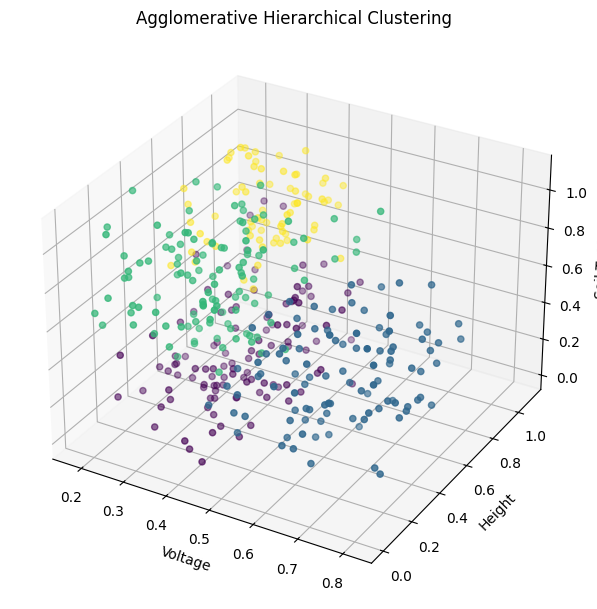

In [23]:
agg_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=10, linkage='ward')
augmented_data['agg_cluster'] = agg_cluster.fit_predict(scaled_features_augmented)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(augmented_data['voltage'], augmented_data['height'], augmented_data['soiltype'], c=augmented_data['agg_cluster'], cmap='viridis')
ax.set_title('Agglomerative Hierarchical Clustering')
ax.set_xlabel('Voltage')
ax.set_ylabel('Height')
ax.set_zlabel('Soil Type')
plt.tight_layout()
plt.show()


**Evaluating both the models**

In [24]:
sil_orig_agg = silhouette_score(scaled_features_original, data['agg_cluster'])
sil_aug_agg = silhouette_score(scaled_features_augmented, augmented_data['agg_cluster'])

sil_orig_agg, sil_aug_agg

(0.2783494230600197, 0.3304391300588335)

<hr>

***Visualising and evaluating the performance of both clustering algorithnms on original data***

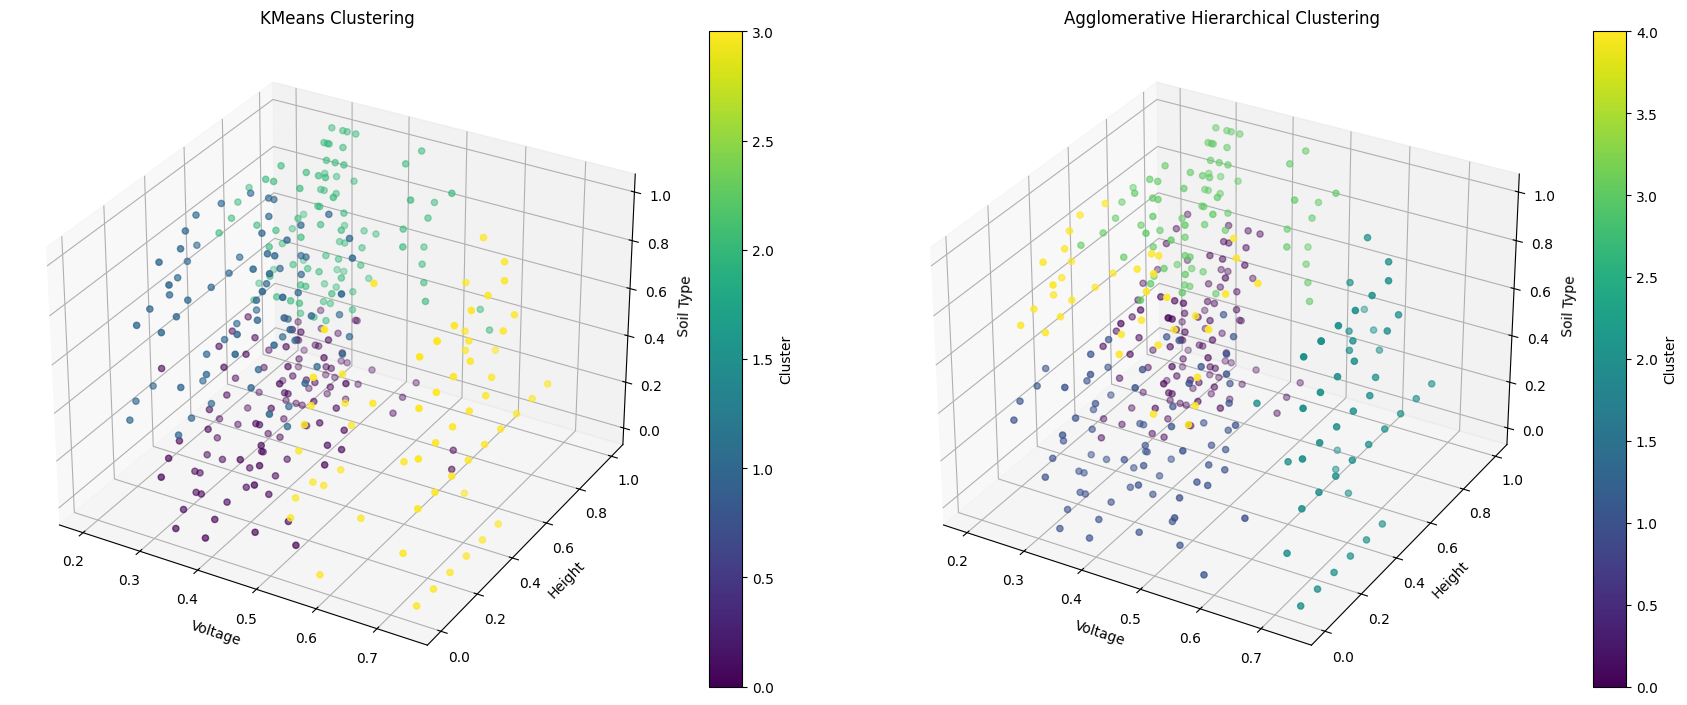

Silhouette Score for KMeans Clustering: 0.30976780440378515
Silhouette Score for Agglomerative Hierarchical Clustering: 0.2783494230600197


In [25]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_features)
data['kmeans_cluster'] = kmeans.labels_

agg_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=10, linkage='ward')
data['agg_cluster'] = agg_cluster.fit_predict(scaled_features)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7), subplot_kw={'projection': '3d'})

scatter1 = ax1.scatter(data['voltage'], data['height'], data['soiltype'], c=data['kmeans_cluster'], cmap='viridis')
ax1.set_title('KMeans Clustering')
ax1.set_xlabel('Voltage')
ax1.set_ylabel('Height')
ax1.set_zlabel('Soil Type')
plt.colorbar(scatter1, ax=ax1, label='Cluster')

scatter2 = ax2.scatter(data['voltage'], data['height'], data['soiltype'], c=data['agg_cluster'], cmap='viridis')
ax2.set_title('Agglomerative Hierarchical Clustering')
ax2.set_xlabel('Voltage')
ax2.set_ylabel('Height')
ax2.set_zlabel('Soil Type')
plt.colorbar(scatter2, ax=ax2, label='Cluster')

plt.tight_layout()
plt.show()

silhouette_kmeans = silhouette_score(scaled_features, data['kmeans_cluster'])
silhouette_agg = silhouette_score(scaled_features, data['agg_cluster'])

print(f"Silhouette Score for KMeans Clustering: {silhouette_kmeans}")
print(f"Silhouette Score for Agglomerative Hierarchical Clustering: {silhouette_agg}")


***Evaluating the performance of both the models on Combined data***

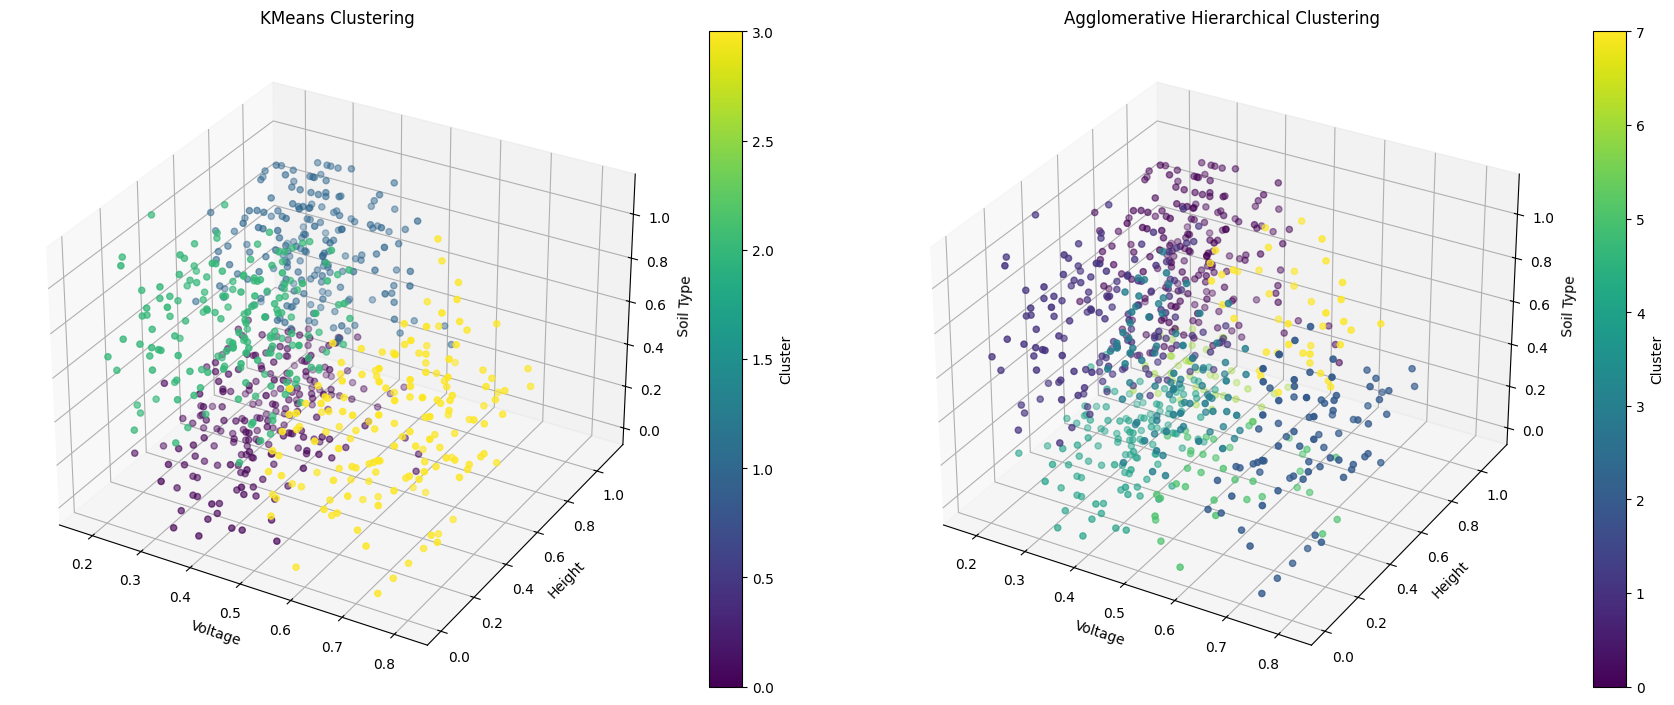

Silhouette Score for KMeans Clustering: 0.3458930486432533
Silhouette Score for Agglomerative Hierarchical Clustering: 0.22541581355806023


In [26]:
# Combine the original and augmented scaled features
scaled_features_combined = np.vstack((scaled_features_original, scaled_features_augmented))

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_features_combined)
combined_data['kmeans_cluster'] = kmeans.labels_

agg_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=10, linkage='ward')
combined_data['agg_cluster'] = agg_cluster.fit_predict(scaled_features_combined)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7), subplot_kw={'projection': '3d'})

scatter1 = ax1.scatter(combined_data['voltage'], combined_data['height'], combined_data['soiltype'], c=combined_data['kmeans_cluster'], cmap='viridis')
ax1.set_title('KMeans Clustering')
ax1.set_xlabel('Voltage')
ax1.set_ylabel('Height')
ax1.set_zlabel('Soil Type')
plt.colorbar(scatter1, ax=ax1, label='Cluster')

scatter2 = ax2.scatter(combined_data['voltage'], combined_data['height'], combined_data['soiltype'], c=combined_data['agg_cluster'], cmap='viridis')
ax2.set_title('Agglomerative Hierarchical Clustering')
ax2.set_xlabel('Voltage')
ax2.set_ylabel('Height')
ax2.set_zlabel('Soil Type')
plt.colorbar(scatter2, ax=ax2, label='Cluster')

plt.tight_layout()
plt.show()

silhouette_kmeans = silhouette_score(scaled_features_combined, combined_data['kmeans_cluster'])
silhouette_agg = silhouette_score(scaled_features_combined, combined_data['agg_cluster'])

print(f"Silhouette Score for KMeans Clustering: {silhouette_kmeans}")
print(f"Silhouette Score for Agglomerative Hierarchical Clustering: {silhouette_agg}")


### **Conclusion**

This project highlights the effectiveness of augmented data generation techniques in expanding the `land_mines` dataset. By employing KMeans clustering, augmented data was created to mimic the characteristics of the original dataset, effectively increasing data volume while preserving its inherent patterns. Evaluation through metrics like silhouette scores demonstrated the fidelity of generated data in replicating original clustering structures. This approach not only enriches the dataset but also lays a foundation for scalable and reliable data-driven solutions in mine detection and classification applications.
